In [1]:
%load_ext autoreload
%autoreload 1

In [2]:
import numpy as np
import pandas as pd
import datetime, copy, imp
import pickle
import time
import os
import re
from sklearn.model_selection import StratifiedKFold
from importlib import reload


from tqdm.auto import tqdm, trange
from tqdm.notebook import tqdm
tqdm.pandas()

import sys
sys.path.insert(0, '../util/')

In [3]:
# Data description


dataFileStr = '../data/MLBHospitalData.hd5'
dat = pd.read_hdf(dataFileStr,key='Data')

In [4]:
dat

Date           Event
Player                                          
abrej003 0   2009-01-08 00:01:00  GoodTestResult
         1   2009-06-03 00:01:00            Stay
         2   2009-06-05 00:01:00            Stay
         3   2009-06-06 00:01:00            Stay
         4   2009-06-07 00:01:00            Stay
...                          ...             ...
zunim001 718 2014-10-26 00:01:00            Stay
         719 2014-10-29 00:01:00            Stay
         720 2014-11-05 00:01:00            Stay
         721 2014-11-12 00:01:00            Stay
         722 2015-12-11 00:01:00  GoodTestResult

[452995 rows x 2 columns]

In [5]:
# List of the diffirent states a patient can be in


dat.Event.unique()

array(['GoodTestResult', 'Stay', 'BadTestResult', 'VitalsCrash'],
      dtype=object)

In [6]:
# Population of the data


n = len(dat.index.get_level_values(0).unique())
print('Population: {} individuals'.format(n))

Population: 915 individuals


<AxesSubplot:>

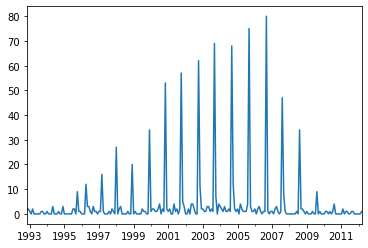

In [7]:
entryDates = dat.groupby(level=0).apply(lambda x: x.Date.min())
entryDateCount = pd.Series(range(n),index=entryDates).resample('1M').count()
entryDateCount.plot()

In [8]:
# summary of each individual's uique events


def timeline_summary(tbl,startDate='NoDate',endDate='NoDate'):
    if startDate != 'NoDate' and endDate != 'NoDate':
        tbl = tbl.loc[ (tbl.Date >= startDate) & (tbl.Date <= endDate) ]
        
    return pd.Series({
        'NumGoodTestResult': (tbl.Event == 'GoodTestResult').sum(),
        'NumStay': (tbl.Event == 'Stay').sum(),
        'NumBadTestResult': (tbl.Event == 'BadTestResult').sum(),
        'NumVitalsCrash': (tbl.Event == 'VitalsCrash').sum(),
        'Tenure': (tbl.Date.max()-tbl.Date.min()).days
    })

In [9]:
ftr = dat.groupby(level=0).progress_apply(timeline_summary)

  0%|          | 0/915 [00:00<?, ?it/s]

In [10]:
ftr

,NumGoodTestResult,NumStay,NumBadTestResult,NumVitalsCrash,Tenure
Player,,,,,
abrej003,3,899,179,5,2180
ackld001,9,556,46,0,3502
adamc001,10,64,2,0,4709
adaml001,17,15,7,0,4100
adamm002,12,548,116,0,4040
...,...,...,...,...,...
zimmb001,2,104,10,0,2991
zimmj003,4,273,1,0,4803
zimmr001,4,1618,270,4,5500
